# **Proyecto SQL**

El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

Te han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

## **Ejercicio**
- Encuentra el número de libros publicados después del 1 de enero de 2000.
- Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.
- Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).
- Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.
- Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

## **Instrucciones para completar la tarea**
- Describe los objetivos del estudio.
- Estudia las tablas (imprime las primeras filas).
- Realiza una consulta SQL para cada una de las tareas.
- Genera los resultados de cada consulta en el Notebook.
- Describe tus conclusiones para cada una de las tareas.

## **Descripción de los datos**

### **books**  
Contiene datos sobre libros:  
- **book_id** — identificación del libro  
- **author_id** — identificación del autor o autora  
- **title** — título  
- **num_pages** — número de páginas  
- **publication_date** — fecha de la publicación  
- **publisher_id** — identificación de la editorial  

### **authors**  
Contiene datos sobre autores:  
- **author_id** — identificación del autor o autora  
- **author** — el autor o la autora  

### **publishers**  
Contiene datos sobre editoriales:  
- **publisher_id** — identificación de la editorial  
- **publisher** — la editorial  

### **ratings**  
Contiene datos sobre las calificaciones de usuarios:  
- **rating_id** — identificación de la calificación  
- **book_id** — identificación del libro  
- **username** — el nombre del usuario que revisó el libro  
- **rating** — calificación  

### **reviews**  
Contiene datos sobre las reseñas de los y las clientes:  
- **review_id** — identificación de la reseña  
- **book_id** — identificación del libro  
- **username** — el nombre del usuario que revisó el libro  
- **text** — el texto de la reseña  


# Importar librerias

In [2]:
#Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Conexión a la base de datos

In [ ]:
db_config = {
    'user': 'practicum_student',
    'pwd': 'QnmDH8Sc2TQLvy2G3Vvh7',
    'host': 'yp-trainers-practicum.cluster-czs0gxyx2d8w.us-east-1.rds.amazonaws.com', 
    'port': 5432, 
    'db': 'data-analyst-final-project-db'
 }
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],db_config['pwd'],db_config['host'],db_config['port'],db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# Función para las consultas

In [4]:
def consulta(query):
    consulta = pd.read_sql(query, con=engine)
    return consulta

# Visualizar las tablas

In [5]:
query = '''
        SELECT *
        FROM books       
        '''
books = consulta(query)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [6]:
query2 = '''
        SELECT *
        FROM authors       
        '''
authors = consulta(query2)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
query3 = '''
        SELECT *
        FROM publishers       
        '''
publishers = consulta(query3)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [8]:
query4 = '''
        SELECT *
        FROM ratings       
        '''
ratings = consulta(query4)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [9]:
query5 = '''
        SELECT *
        FROM reviews       
        '''
reviews = consulta(query5)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


# Ejercicios

## Encuentra el número de libros publicados después del 1 de enero de 2000.

In [10]:
query6 ='''
        SELECT 
                COUNT(title) AS books
        FROM 
                books
        WHERE 
                publication_date > '2000-01-01'
        '''

booksAfter200 = consulta(query6)
booksAfter200

,books
0,819


### Interpretación
- Desde el primero de enero del 2000 se publicaron 819 libros

## Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.

In [11]:
query7 = '''
        SELECT
            reviews.book_id,
            COUNT(reviews.review_id) AS cnt_review,
            AVG(ratings.rating) AS avg_rating
        FROM
            reviews
        JOIN ratings ON reviews.book_id = ratings.book_id
        GROUP BY 
            reviews.book_id
        ORDER BY 
            avg_rating DESC;
'''
users_rating_and_avg = consulta(query7)
users_rating_and_avg.head()

,book_id,cnt_review,avg_rating
0,55,4,5.0
1,518,4,5.0
2,347,6,5.0
3,513,4,5.0
4,57,4,5.0


In [12]:
corr = users_rating_and_avg[['cnt_review','avg_rating']].corr()

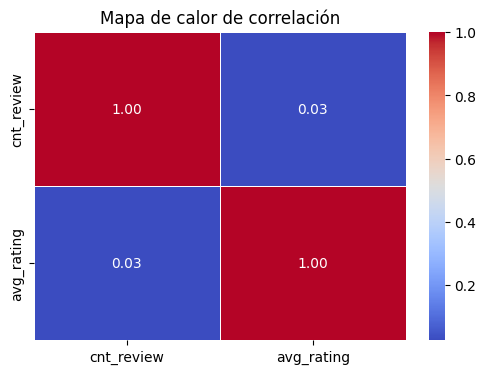

In [13]:
# Generamos el mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Mapa de calor de correlación")
plt.show()

### Interpretacion
Dada la matriz de correlación que se creo para intentar entender si la calificación promedio de los libros se ve afectada por la cantidad de reseñas nos damos cuenta que:

- No hay una relación significativa entre el número de reseñas y la calificación promedio de los libros.

- Esto significa que un libro con muchas reseñas no necesariamente tendrá una calificación más alta o más baja.

- La calificación parece ser independiente de la cantidad de reseñas que recibe un libro.

## Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).

In [14]:
query8 ='''
        SELECT
                publishers.publisher,
                COUNT(books.book_id) AS num_book
        FROM 
                publishers
        JOIN 
                books ON publishers.publisher_id = books.publisher_id
        WHERE
                books.num_pages > 50
        GROUP BY
                publishers.publisher
        ORDER BY
                num_book DESC
        LIMIT 1
        '''
publisher_50pages = consulta(query8)
publisher_50pages.head()

,publisher,num_book
0,Penguin Books,42


### Interpretación
'Penguin Books' es la editorial que más libros con más de 50 páginas ha publicado, con un total de 42 libros

## Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.

In [15]:
query9 ='''
        SELECT 
            books.title,
            authors.author,
            books.book_id,
            AVG(ratings.rating) AS avg_rating
        FROM
            books
        JOIN 
            ratings ON ratings.book_id = books.book_id
        JOIN
            authors ON authors.author_id = books.author_id
        GROUP BY
            authors.author, books.book_id
        HAVING
            COUNT(ratings.rating_id) > 50
        ORDER BY 
            avg_rating DESC
        LIMIT
            1;
        '''
author_Max_rating = consulta(query9)
author_Max_rating.head()

,title,author,book_id,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,302,4.414634


### Interpretación
- Los autores J.K. Rowling y Mary GrandPré tienen el libro con la mejor calificación promedio (Harry Potter and the Prisoner of Azkaban)

## Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

In [16]:
query10='''
        SELECT 
            AVG(review_count) AS avg_reviews
        FROM(
            SELECT 
                reviews.username,
                COUNT(reviews.review_id) AS review_count
            FROM reviews
            JOIN(
                    SELECT username 
                    FROM ratings 
                    GROUP BY username 
                    HAVING COUNT(DISTINCT book_id) > 50
                ) AS filtered_users 
                ON reviews.username = filtered_users.username
            GROUP BY reviews.username
            ) AS user_reviews;
        '''
avg_user_reviews = consulta(query10)
avg_user_reviews

,avg_reviews
0,24.333333


### Interpretación
- En promedio se los usuarios más activos hacen 24 reseñas de los libros